### **Manual implementation of KMeans Clustering**

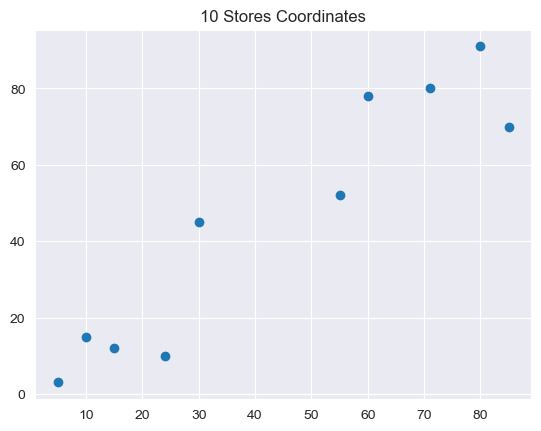

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

points = np.array([[5, 3], [10, 15], [15, 12], [24, 10], [30, 45], [85, 70], [71, 80], [60, 78], [55, 52],[80, 91]])

xs = points[:,0] # Selects all xs from the array
ys = points[:,1] # Selects all ys from the array

plt.title("10 Stores Coordinates")
plt.scatter(x=xs, y=ys)

Let's say we have decided there are two groups of our stores (points). Now, we need to find a way to understand which points belong to which group. This could be done by choosing one point to represent group 1 and one to represent group 2. Those points will be used as a reference when measuring the distance from all other points to each group.

In [5]:
g1 = points[0]
g2 = points[1]

In [6]:
print(g1)
print(g2)

[5 3]
[10 15]


It can be useful to know that Euclidean distance measure is based on Pythagoras' theorem:
c^2 = a^2 + b^2


When the Euclidean distance is adapted to points on a plane (a1, b1) and (a2, b2), the formula becomes c^2 = (a2-a1)^2 +(b2-b1)^2 .

The distance is then calculated as the sqrt(c^2) or 
sqrt((a2-a1)^2 +(b2-b1)^2). 

Now, let's put the distances and groups together by assigning each of our collected store points to a group.

To better visualize that, we will declare three lists. The first one to store points of the first group - points_in_g1. The second one to store points from the group 2 - points_in_g2, and the last one - group, to label the points as either 1 (belongs to group 1) or 2 (belongs to group 2):


In [8]:
points_in_g1 = []
points_in_g2 = []
group = []

In [9]:
for p in points:
    x1, y1 = p[0], p[1]
    euclidean_distance_g1 = np.sqrt((g1[0] - x1)**2 + (g1[1] - y1)**2)
    euclidean_distance_g2 = np.sqrt((g2[0] - x1)**2 + (g2[1] - y1)**2)
    if euclidean_distance_g1 < euclidean_distance_g2:
        points_in_g1.append(p)
        group.append('1')
    else:
        points_in_g2.append(p)
        group.append('2')

In [11]:
print(f'points_in_g1:{points_in_g1}\n \
\npoints_in_g2:{points_in_g2}\n \
\ngroup:{group}')

points_in_g1:[array([5, 3])]
 
points_in_g2:[array([10, 15]), array([15, 12]), array([24, 10]), array([30, 45]), array([85, 70]), array([71, 80]), array([60, 78]), array([55, 52]), array([80, 91])]
 
group:['1', '2', '2', '2', '2', '2', '2', '2', '2', '2']


It's clearly visible that only our first point is assigned to group 1, and all other points were assigned to group 2. That result differs from what we had envisioned in the beginning. One approach is to repeat the process and choose different points to be the references of the groups. This will change our results, hopefully, more in a line with what we've envisioned in the beginning. This second time, we could choose them not at random as we previously did, but by getting a mean of all our already grouped points. That way, those new points could be positioned in the middle of corresponding groups.

For instance, if the second group had only points (10, 15), (30, 45). The new central point would be (10 + 30)/2 and (15+45)/2 - which is equal to (20, 30).

Since we have put our results in lists, we can convert them first to numpy arrays, select their xs, ys and then obtain the mean:

In [12]:
g1_center = [np.array(points_in_g1)[:, 0].mean(), np.array(points_in_g1)[:, 1].mean()]
g2_center = [np.array(points_in_g2)[:, 0].mean(), np.array(points_in_g2)[:, 1].mean()]
g1_center, g2_center

([5.0, 3.0], [47.77777777777778, 50.333333333333336])

In [13]:
def assigns_points_to_two_groups(g1_center, g2_center):
    points_in_g1 = []
    points_in_g2 = []
    group = []

    for p in points:
        x1, y1 = p[0], p[1]
        euclidean_distance_g1 = np.sqrt((g1_center[0] - x1)**2 + (g1_center[1] - y1)**2)
        euclidean_distance_g2 = np.sqrt((g2_center[0] - x1)**2 + (g2_center[1] - y1)**2)
        if euclidean_distance_g1 < euclidean_distance_g2:
            points_in_g1.append(p)
            group.append(1)
        else:
            points_in_g2.append(p)
            group.append(2)
    return points_in_g1, points_in_g2, group

Let's call the function and store its results in points_in_g1, points_in_g2, and group variables:

In [14]:
points_in_g1, points_in_g2, group = assigns_points_to_two_groups(g1_center, g2_center)
points_in_g1, points_in_g2, group

([array([5, 3]), array([10, 15]), array([15, 12]), array([24, 10])],
 [array([30, 45]),
  array([85, 70]),
  array([71, 80]),
  array([60, 78]),
  array([55, 52]),
  array([80, 91])],
 [1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

<AxesSubplot:>

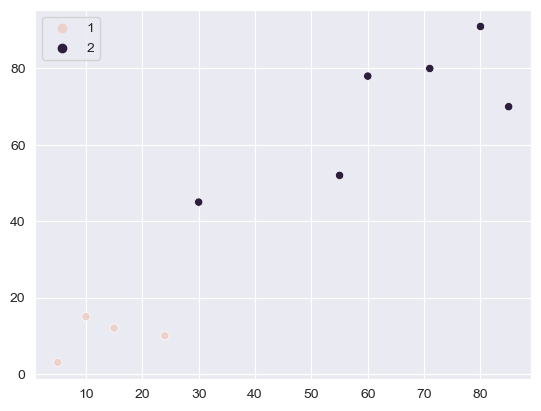

In [15]:
sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=group)

It seems the clustering of our points is getting better. But still, there are two points in the middle of the graph that could be assigned to either group when considering their proximity to both groups. The algorithm we've developed so far assigns both of those points to the second group.

This means we can probably repeat the process once more by taking the means of the Xs and Ys, creating two new central points (centroids) to our groups and re-assigning them based on distance.

Let's also create a function to update the centroids. The whole process now can be reduced to multiple calls of that function:

<AxesSubplot:>

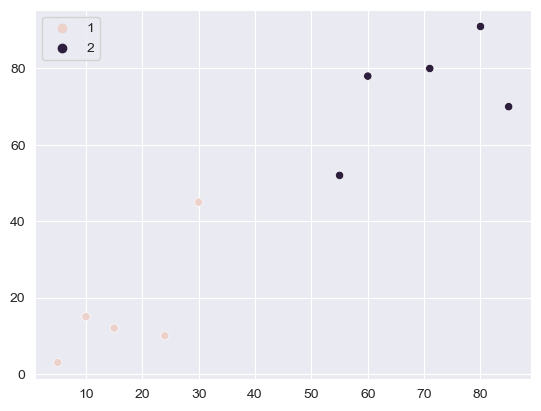

In [16]:
def updates_centroids(points_in_g1, points_in_g2):
    g1_center = np.array(points_in_g1)[:, 0].mean(), np.array(points_in_g1)[:, 1].mean()
    g2_center = np.array(points_in_g2)[:, 0].mean(), np.array(points_in_g2)[:, 1].mean()
    return g1_center, g2_center

g1_center, g2_center = updates_centroids(points_in_g1, points_in_g2)
points_in_g1, points_in_g2, group = assigns_points_to_two_groups(g1_center, g2_center)
sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=group)

Notice that after this third iteration, each one of the points now belong to different clusters. It seems the results are getting better - let's do it once again. Now going to the fourth iteration of our method:

<AxesSubplot:>

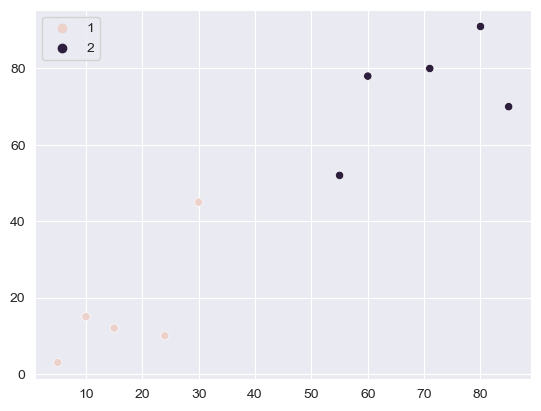

In [17]:
g1_center, g2_center = updates_centroids(points_in_g1, points_in_g2)
points_in_g1, points_in_g2, group = assigns_points_to_two_groups(g1_center, g2_center)

sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=group)

This fourth time we got the same result as the previous one. So it seems our points won't change groups anymore, our result has reached some kind of stability - it has got to an unchangeable state, or converged.

# **Automatic implementation of KMeans**

To double check our result, let's do this process again, but now using 3 lines of code with sklearn:

In [21]:
from sklearn.cluster import KMeans

# The random_state needs to be the same number to get reproducible results
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(points)
kmeans.labels_

C:\Users\hinne\anaconda3\envs\pydata-book\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

<AxesSubplot:>

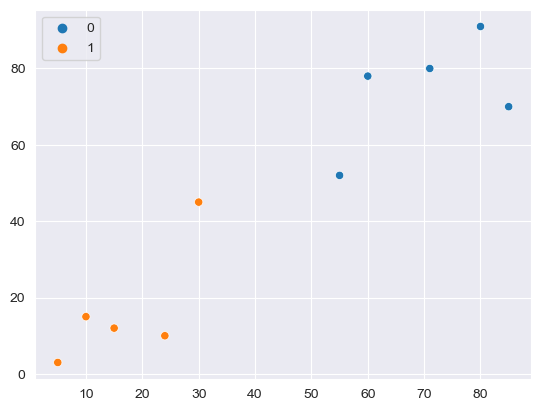

In [22]:
sns.scatterplot(x = points[:,0], y = points[:,1], hue=kmeans.labels_)

# **Hierarchical Clustering**

In [23]:
import pandas as pd

path_to_file = 'shopping.csv'
customer_data = pd.read_csv(path_to_file)

In [24]:
customer_data.shape

(200, 5)

In [25]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Here, we see that marketing has generated a CustomerID, gathered the Genre, Age, Annual Income (in thousands of dollars), and a Spending Score going from 1 to 100 for each of the 200 customers. Spending score depicts how often a person spends money in a mall on a scale of 1 to 100. In other words, if a customer has a score of 0, this person never spends money, and if the score is 100, we have just spotted the highest spender.

<AxesSubplot:>

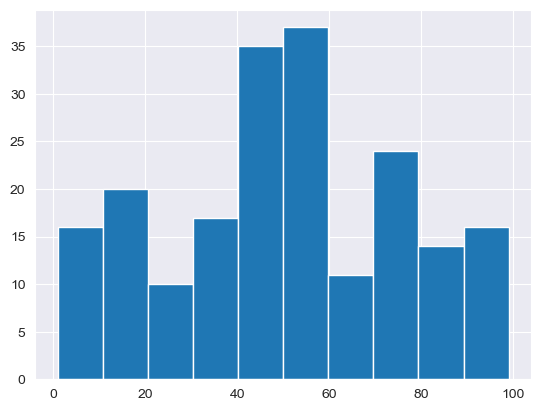

In [26]:
customer_data['Spending Score (1-100)'].hist()

In [29]:
# transpose() transposes the table, making it easier for us to compare values
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


The min value of the Spending Score is 1 and the max is 99. So we don't have 0 or 100 score spenders. Let's then take a look at the other columns of the transposed describe table. When looking at the mean and std columns, we can see that for Age the mean is 38.85 and the std is approximately 13.97. The same happens for Annual Income, with a mean of 60.56 and std 26.26, and for Spending Score with a mean of 50 and std of 25.82. For all features, the mean is far from the standard deviation, which indicates our data has high variability.

To understand better how our data varies, let's plot the Annual Income distribution:

<AxesSubplot:>

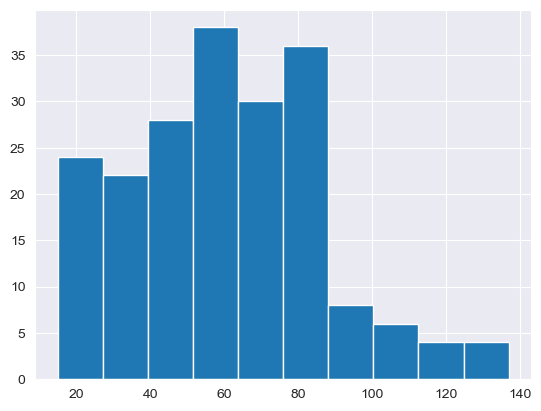

In [31]:
customer_data['Annual Income (k$)'].hist()

With Pandas, we can also list our data types and see if all of our 200 rows are filled or have some null values:

In [35]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
customer_data.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In genre, it seems that it has only Female and Male categories. We can be sure of that by taking a look at its unique values with unique:

In [38]:
customer_data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [39]:
customer_data['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

**Encoding Variables and Feature Engineering**

Let's start by dividing the Age into groups that vary in 10, so that we have 20-30, 30-40, 40-50, and so on. Since our youngest customer is 15, we can start at 15 and end at 70, which is the age of the oldest customer in the data. Starting at 15, and ending at 70, we would have 15-20, 20-30, 30-40, 40-50, 50-60, and 60-70 intervals.


In [40]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
customer_data['Age Groups'] 

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [47]:
customer_data.groupby('Age Groups')['Age Groups'].count()

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

At the moment, we have two categorical variables, Age and Genre, which we need to transform into numbers to be able to use in our model. There are many different ways of making that transformation - we will use the Pandas get_dummies() method that creates a new column for each interval and genre and then fill its values with 0s and 1s- this kind of operation is called one-hot encoding. 

In [49]:
# The _oh means one-hot
customer_data_oh = pd.get_dummies(customer_data)
# Display the one-hot encoded dataframe
customer_data_oh 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


**Basic plotting of our features**

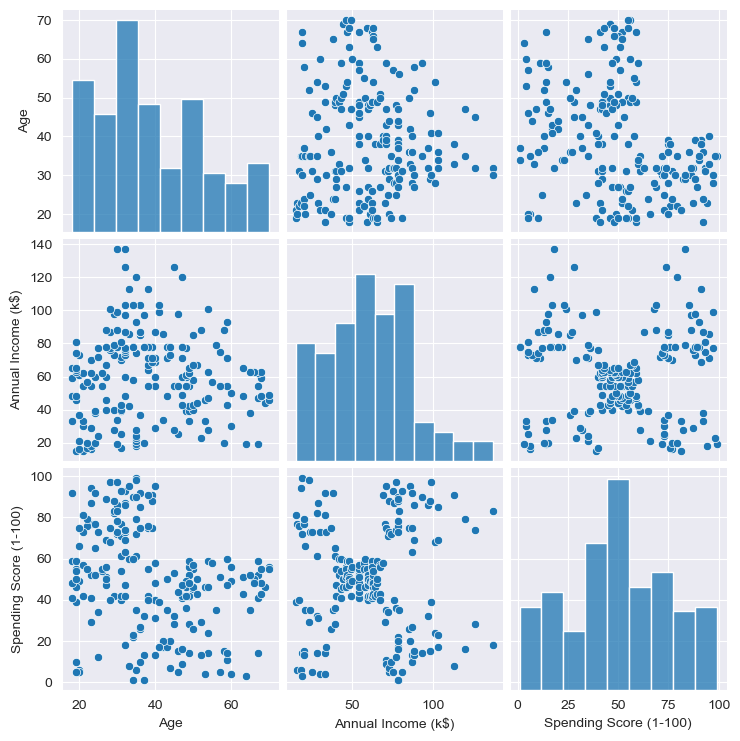

In [50]:
import seaborn as sns

# Dropping CustomerID column from data 
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

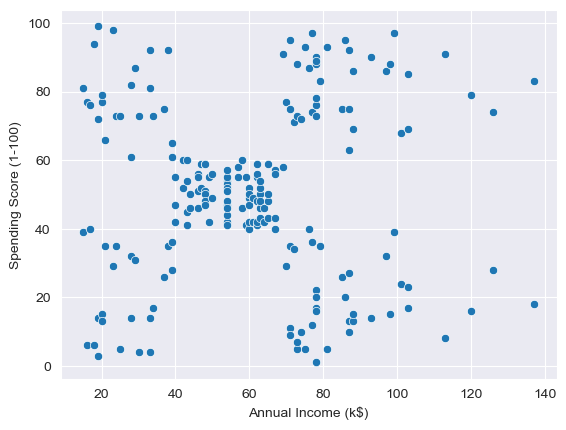

In [52]:
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])

**Plotting Data After Using PCA**

PCA will reduce the dimensions of our data while trying to preserve as much of its information as possible. PCA computes how much the feature values vary towards one another - we call that their covariance. Those results are then organized into a matrix, obtaining a covariance matrix.

After getting the covariance matrix, PCA tries to find a linear combination of features that best explains it - it fits linear models until it identifies the one that explains the maximum amount of variance.

Before applying PCA, we need to choose between the Age column or the Age Groups columns in our previously one-hot encoded data. Since both columns represent the same information, introducing it twice affects our data variance. 

In [53]:
customer_data_oh = customer_data_oh.drop(['Age'], axis=1)
customer_data_oh.shape # (200, 10)

(200, 11)

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit_transform(customer_data_oh)
pca.explained_variance_ratio_.cumsum()

array([0.85268543, 0.99431178, 0.99973942, 0.99984572, 0.99990085,
       0.99993646, 0.99996214, 0.99998194, 1.        , 1.        ])

<AxesSubplot:>

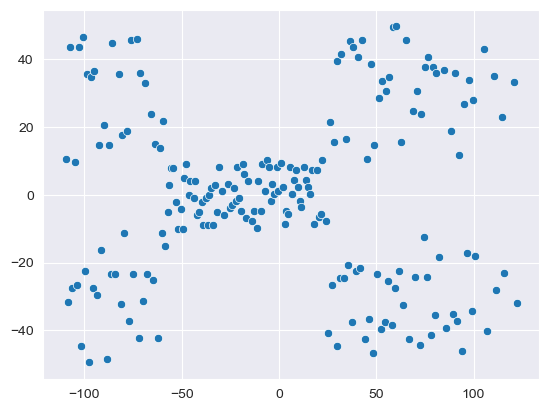

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(customer_data_oh)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

The data plot after PCA is very similar to the plot that is using only two columns of the data without PCA. Notice that the points that are forming groups are closer, and a little more concentrated after the PCA than before.

**Visualizing Hierarchical Structure with Dendrograms**

The plots indicate we have 5 clusters in our data, but there's also another way to visualize the relationships between our points and help determine the number of clusters - by creating a dendrogram.

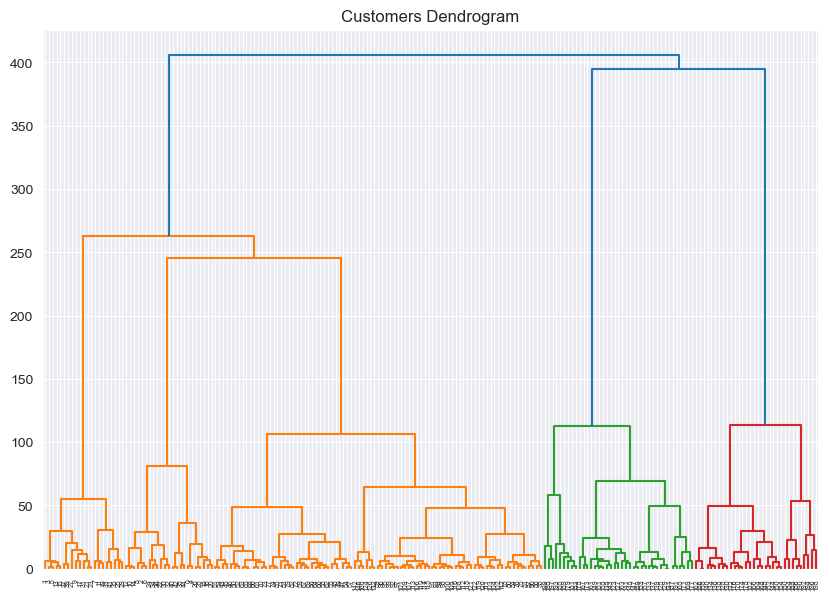

In [61]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
                       method='ward',
                       metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

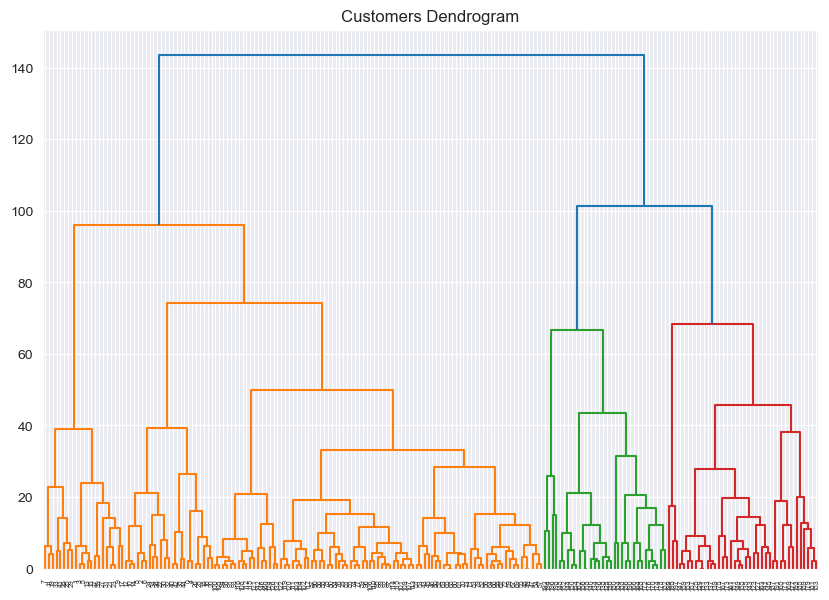

In [60]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
                       method='complete',
                       metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

**Create a document and answer the following questions as thoroughly as possible. Do not plagiarize and complete the questions independently.** 
1. Explain the steps of k-Means Clustering Algorithm. Include all mathematical algorithms and parameters necessary for clustering. 
2. What are some Stopping Criteria for k-Means Clustering?
3. Compare Hierarchical Clustering and k-Means Clustering. 
4. What is the Objective Function of k-Means?
5. What is the difference between the Manhattan Distance and Euclidean Distance in Clustering?
6. What is the curse of dimensionality and how may it affect k-Means Clustering?
7. Is it possible that the assignment of data points to clusters does not change between successive iterations in the K means Algorithm?
8. Explain some cases where K means clustering may fail to give good results.

Upload document with answers to eLearning: DCS Lab 4 Clustering Walkthrough.